In [132]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
from sklearn.datasets import load_boston

In [44]:
boston=load_boston()

In [45]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [46]:
print(boston.data.shape)

(506, 13)


In [47]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [48]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
bos=pd.DataFrame(boston.data)

In [50]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [51]:
bos.columns=boston.feature_names

In [52]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
print(boston.target.shape)

(506,)


In [54]:
bos['Price']=boston.target

In [55]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
bos.shape

(506, 14)

In [57]:
x=bos.drop('Price',axis=1)
y=bos["Price"]

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
lin_re=LinearRegression()
lin_re.fit(x_train,y_train)
print(f'Cofficent:{lin_re.coef_}')
print(f'intercept:{lin_re.intercept_}')
print(f'R^2 score:{lin_re.score(x_train,y_train)}')
print(f'R^2 score:{lin_re.score(x_test,y_test)}')

Cofficent:[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
intercept:38.09169492630278
R^2 score:0.7730135569264234
R^2 score:0.589222384918251


In [60]:
x_constant=sm.add_constant(x)
lin_re=sm.OLS(y,x_constant).fit()
lin_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        12:04:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
x_constant.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


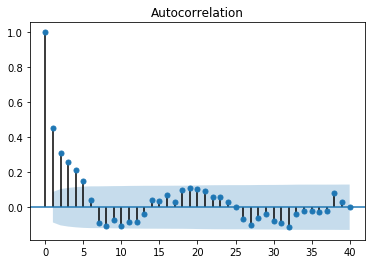

In [62]:
acf=smt.graphics.plot_acf(lin_re.resid,lags=40)
acf.show()

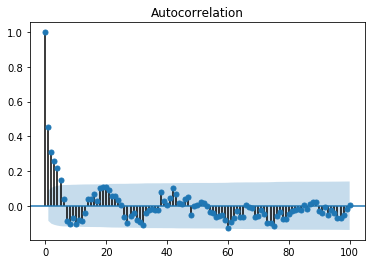

In [63]:
acf=smt.graphics.plot_acf(lin_re.resid,lags=100)
acf.show()

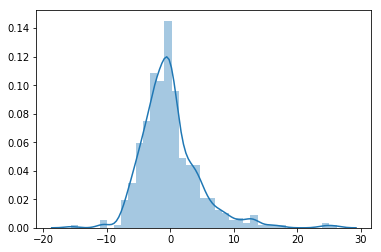

In [64]:
sns.distplot(lin_re.resid)

In [66]:
print(stats.jarque_bera(lin_re.resid))

(783.1262780507673, 0.0)


In [67]:
bos['Price'].plot

In [68]:
bos['Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

For removing outliers

In [ ]:
upperLimit=25+1.5*(25-17)
lowerLimit=17+1.5*(25-17)
print(upperLimit,lowerLimit)

In [70]:
df1=bos[bos['Price']>37]
print(df1.shape)
df2=bos[bos['Price']<5]
print(df2.shape)

(37, 14)
(0, 14)


In [71]:
bos1=bos[bos['Price']<37]
bos1.shape

(468, 14)

In [72]:
x1=bos1.drop('Price',axis=1)
y1=bos1["Price"]

In [73]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [82]:
lin_reg=LinearRegression()
lin_reg.fit(x1_train,y1_train)
print(f'Cofficent:{lin_reg.coef_}')
print(f'intercept:{lin_reg.intercept_}')
print(f'R^2 score:{lin_reg.score(x1_train,y1_train)}')
print(f'R^2 score:{lin_reg.score(x1_test,y1_test)}')

Cofficent:[-1.11214007e-01  3.60592809e-02 -5.17835159e-02  1.11495795e+00
 -1.31081688e+01  1.69057448e+00 -7.41287240e-03 -1.00402270e+00
  2.20913292e-01 -1.10918875e-02 -7.50822079e-01  5.55513342e-03
 -4.12361364e-01]
intercept:42.47316767620746
R^2 score:0.7684212911333229
R^2 score:0.7401768685518162


In [83]:
x1_constant=sm.add_constant(x1)
lin_reg=sm.OLS(y1,x1_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          1.59e-134
Time:                        12:09:33   Log-Likelihood:                -1199.8
No. Observations:                 468   AIC:                             2428.
Df Residuals:                     454   BIC:                             2486.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7094      3.610     11.001      0.000      32.616      46.803
CRIM          -0.1149      0.022     -5.180      0.000      -0.158      -0.071
ZN             0.0385      0.010      3.762      0.000       0.018       0.059
INDUS         -0.0359      0.043     -0.834      0.405      -0.120       0.049
CHAS           1.0626      0.643      1.651      0.099      -0.202       2.327
NOX          -11.9830      2.623     -4.569      0.000     -17.137      -6.829
RM             1.8751      0.336      5.574      0.000       1.214       2.536
AGE           -0.0196      0.009     -2.107      0.036      -0.038      -0.001
DIS           -1.0196      0.141     -7.212      0.000      -1.297      -0.742
RAD            0.2328      0.046      5.102      0.000       0.143       0.323
TAX           -0.0121      0.003     -4.655      0.000      -0.017      -0.007
PTRATIO       -0.6987      0.092     -7.607      0.000      -0.879      -0.518
B              0.0069      0.002      3.826      0.000       0.003       0.010
LSTAT         -0.3785      0.037    -10.364      0.000      -0.450      -0.307
==============================================================================
Omnibus:                       48.469   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.117
Skew:                           0.698   Prob(JB):                     8.05e-17
Kurtosis:                       4.360   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
x1_constant.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


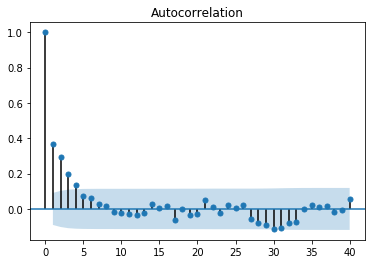

In [85]:
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40)
acf.show()

In [86]:
print(stats.jarque_bera(lin_reg.resid))

(74.11700927734893, 1.1102230246251565e-16)


###### Assumptions-Linearity of residuals

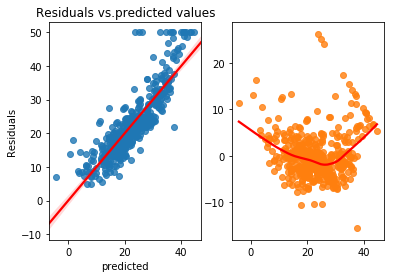

In [205]:
def linerity_test(model,y):
    fitted_vals=model.predict()
    resids=model.resid
    fig,ax=plt.subplots(1,2)
    sns.regplot(x=fitted_vals,y=y,ax=ax[0],line_kws={'color':'red'})
    ax[0].set_title('observed vs.predicted values')
    ax[0].set(xlabel='predicted',ylabel='observed')
    sns.regplot(x=fitted_vals,y=resids,lowess=True,ax=ax[1],line_kws={'color':'red'})
    ax[0].set_title('Residuals vs.predicted values')
    ax[0].set(xlabel='predicted',ylabel='Residuals')
linerity_test(lin_re,y)

Rainbow test

In [107]:
sm.stats.diagnostic.linear_rainbow(res=lin_re)#with outliers

(0.5808507639614257, 0.999988852262534)

In [106]:
sm.stats.diagnostic.linear_rainbow(res=lin_reg)# with out outliers

(1.1289509140143557, 0.18139868974214038)

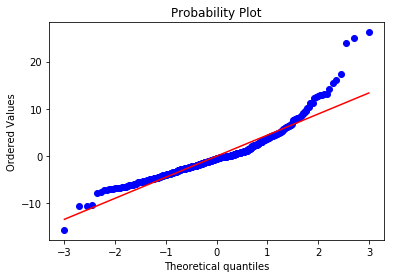

In [114]:
stats.probplot(lin_re.resid,dist='norm',plot=plt)
plt.show()

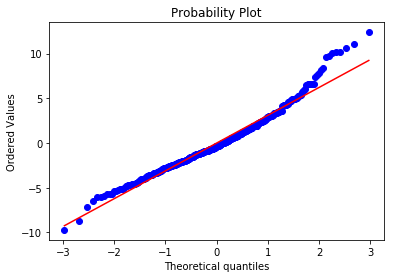

In [115]:
stats.probplot(lin_reg.resid,dist='norm',plot=plt)
plt.show()

In [116]:
lin_re.resid.mean()

6.392778269857423e-15

In [117]:
lin_reg.resid.mean()

-1.1140186588973793e-14

In [ ]:
Goldfeld Test

In [130]:
name=['F Statistic','P-value']
test=sms.het_goldfeldquandt(lin_re.resid,lin_re.model.exog)
lzip(name,test)

[('F Statistic', 2.4311473253497464), ('P-value', 7.302071915608556e-12)]

In [131]:
name=['F Statistic','P-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)
lzip(name,test)

[('F Statistic', 1.807471734214372), ('P-value', 6.698399001480887e-06)]

we can also use two statistical test: Breusch-pagan/goldfeld-quandt.In both of the null hypothesis assumes homoscedasticity and p-value elow a certain level(like 0.05) indicates we should reject the null in favor of heteroscedasticity.
    
    
Here pvalue is less than 0.05 so,it is homoscedasticity distribution.    

### No Multicollinearity

In [137]:
vif=[variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=x.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


#### so,multicollinearity exists for tax and RAD more then 5 so we can eliminate those and features to get multicollinearity

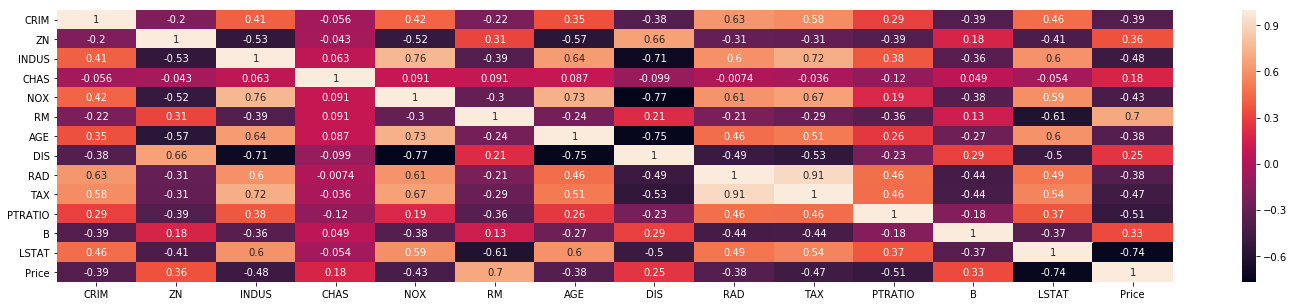

In [165]:
Fsc


In [188]:
df2=x.drop('TAX',axis=1)
df2.head()
df2.shape

(506, 12)

In [186]:
x_constant.shape

(506, 13)

In [191]:
vif=[variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=df2.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
vif,1.79194,2.18424,3.226015,1.05822,4.369271,1.923075,3.098044,3.954446,2.837494,1.788839,1.347564,2.9408


In [194]:
df3=x1.drop('TAX',axis=1)
df3.head()
df3.shape

(468, 12)

In [195]:
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [196]:
x_constant.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [197]:
vif=[variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=df3.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
vif,1.79194,2.18424,3.226015,1.05822,4.369271,1.923075,3.098044,3.954446,2.837494,1.788839,1.347564,2.9408
